# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

***GROUP MEMBERS***

* THÁI TUẤN KHA        K194141725
* LÂM NHỰT THỊNH       K194141751
* TRẦN THANH TRÚC      K194141755
* NGUYỄN TUẤN HƯNG     K194141723
* HỒ NGỌC QUỲNH NHƯ    K194141738

In [2]:
data = pd.read_csv('E:\Lam Nhut Thinh\Machine Learning\\data_final.csv',index_col=0)
data

,Research And Development,Total Operating Expense,Operating Income,"Interest Expense, Net - Operating",Income Tax - Total,Net Income Incl Extra Before Distributions,Preferred Dividends,Basic Normalized EPS,Diluted Normalized EPS,Basic Weighted Average Shares,...,"Cash from Operating Activities, Cumulative","Capital Expenditures, Discrete","Cash from Investing Activities, Cumulative","Cash from Financing Activities, Cumulative","FOCF Ex Dividends, Discrete","Net Change in Cash, Cumulative","Pretax Margin, Percent",Operating Profit Margin,"Net Profit Margin, (%)",Target
Name,,,,,,,,,,,,,,,,,,,,,
CHP.HM,NaN,5.329274e+11,2.545201e+11,1.158986e+11,1.241771e+10,2.420746e+11,NaN,1647.40909,1647.40909,146912670.0,...,3.109158e+11,8.651382e+09,-4.514561e+09,-4.850702e+11,3.022644e+11,-1.786692e+11,32.31864,NaN,30.74169,1
POM.HM,NaN,1.378265e+13,2.176012e+11,3.947202e+11,3.336702e+10,1.822244e+11,NaN,642.65118,642.65118,278543550.0,...,-4.610515e+11,9.654058e+11,-9.335639e+11,1.725715e+12,-1.426457e+12,3.309851e+11,1.54209,NaN,1.30158,1
TDC.HM,NaN,1.484144e+12,1.740635e+11,1.546102e+11,5.008222e+10,1.207732e+11,NaN,1901.05222,1901.05222,100000000.0,...,-4.346490e+10,3.966927e+09,-1.146927e+09,8.166955e+10,-4.743183e+10,3.705772e+10,10.52129,NaN,6.11606,1
OGC.HM,NaN,3.493755e+11,6.046720e+10,1.372862e+10,3.915555e+09,1.445611e+11,NaN,482.00000,482.00000,299919350.0,...,-1.340004e+11,7.905459e+10,-2.804611e+09,1.792958e+10,-2.130550e+11,-1.188754e+11,26.53096,0.0,35.27235,1
NVT.HM,NaN,1.925600e+11,-6.593012e+10,1.649418e+10,-1.715912e+09,-5.311811e+10,NaN,-586.94047,-586.94047,90500000.0,...,2.593067e+10,5.226709e+09,-2.973585e+11,2.878679e+11,2.070396e+10,1.647019e+10,-52.77194,NaN,-41.94755,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVI.HM,NaN,1.722265e+12,1.149172e+11,6.010629e+09,2.321289e+10,9.211948e+10,NaN,7441.51804,7441.51804,12832440.0,...,1.206092e+11,8.226478e+09,1.720859e+10,-1.056608e+11,1.123828e+11,3.208050e+10,6.27768,NaN,5.01417,0
BVH.HM,NaN,4.316567e+13,-5.587410e+12,NaN,3.730695e+11,1.896699e+12,NaN,2553.11463,2553.11463,742322760.0,...,1.232165e+13,2.377686e+11,-1.428670e+13,5.389117e+11,1.208388e+13,-1.426650e+12,6.32411,0.0,5.04733,0
LIX.HM,NaN,2.402414e+12,2.105892e+11,4.122230e+09,4.365618e+10,1.673662e+11,NaN,4636.13657,4636.13657,32400000.0,...,2.130042e+11,5.415793e+10,-5.364795e+10,-3.240000e+10,1.588462e+11,1.269582e+11,8.07585,NaN,5.75278,0


# DATA PROCESSING

In [3]:
X = data.drop(['Target'],axis=1)
y = data['Target']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=0)

In [5]:
X_train.columns = [i.split(',')[0] for i in X_train.columns]
X_test.columns = [i.split(',')[0] for i in X_test.columns]

In [6]:
X_train.isnull().sum()

Research And Development                      353
Total Operating Expense                        14
Operating Income                               14
Interest Expense                               35
Income Tax - Total                              0
Net Income Incl Extra Before Distributions      0
Preferred Dividends                           356
Basic Normalized EPS                            0
Diluted Normalized EPS                          0
Basic Weighted Average Shares                   0
Diluted Weighted Average Shares                 0
DPS - Common Stock Primary Issue              135
Gross Margin                                   19
EBIT Margin                                     0
EBITDA                                          0
EBIT                                            0
Cash and Short Term Investments                19
Short Term Investments                         85
Total Receivables                              14
Total Inventory                                31


In [7]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

class FeatureSelector():

    def __init__(self):
        
        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None
        
        self.feature_importances = None
        
        # Dictionary to hold removal operations
        self.removal_ops = {}
        
        
        
    def identify_missing(self, data, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""
        
        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column 
        missing_series = data.isnull().sum() / data.shape[0]
        
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.removal_ops['missing'] = to_drop

        print(to_drop)
        print('%d features with greater than %0.2f missing values.\n' % (len(self.removal_ops['missing']), self.missing_threshold))
        
    def identify_collinear(self, data, correlation_threshold):

        
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

            
        self.record_collinear = record_collinear
        self.removal_ops['collinear'] = to_drop
        
        print(to_drop)
        print('%d features with a correlation greater than %0.2f.\n' % (len(self.removal_ops['collinear']), self.correlation_threshold))

    
    
    def remove(self, data, methods):

        
        
        features_to_drop = []
        
        data = pd.get_dummies(data)
        
        if methods == 'all':
            
            print('{} methods have been run'.format(list(self.removal_ops.keys())))
            
            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.removal_ops.values()))))
            
        else:
            # Iterate through the specified methods
            for method in methods:
                # Check to make sure the method has been run
                if method not in self.removal_ops.keys():
                    raise NotFittedError('%s method has not been run' % method)
                    
                # Append the features identified for removal
                else:
                    features_to_drop.append(self.removal_ops[method])
        
            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))
            
        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        
        print('Removed %d features' % len(features_to_drop))
        return data
    
    def plot_missing(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
        self.reset_plot()
        self.missing_stats.plot.hist(color = 'red', edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Missing Fraction', size = 18); plt.title('Missing Fraction Histogram', size = 18);
    
    def plot_collinear(self):

        
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
        # Identify the correlations that were above the threshold
        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
                                                list(set(self.record_collinear['drop_feature']))]

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 8))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        
        plt.xlabel('Features to Remove', size = 8); plt.ylabel('Correlated Feature', size = 8)
        plt.title("Correlations Above Threshold", size = 14)
        

    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

***REMOVE NULL VALUES***

In [8]:
fs = FeatureSelector()

['Research And Development', 'Preferred Dividends', 'DPS - Common Stock Primary Issue', 'Short Term Investments', 'Goodwill', 'Long Term Investments', 'Other Liabilities', 'Depreciation And Amortization', 'Operating Profit Margin']
9 features with greater than 0.11 missing values.



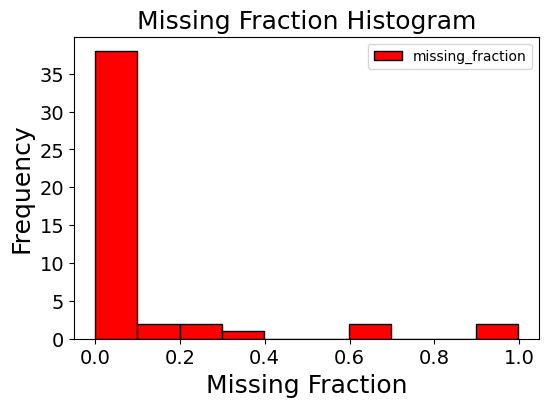

In [9]:
fs.identify_missing(X_train, 0.11)
fs.plot_missing()

In [10]:
X_train = X_train.drop(['Research And Development', 'Preferred Dividends', 'DPS - Common Stock Primary Issue',
                        'Short Term Investments', 'Goodwill', 'Long Term Investments', 'Other Liabilities', 
                        'Depreciation And Amortization', 'Operating Profit Margin'],
                       axis=1)

In [11]:
X_train

,Total Operating Expense,Operating Income,Interest Expense,Income Tax - Total,Net Income Incl Extra Before Distributions,Basic Normalized EPS,Diluted Normalized EPS,Basic Weighted Average Shares,Diluted Weighted Average Shares,Gross Margin,...,Net Debt Incl. Pref.Stock & Min.Interest,Other Long Term Assets,Cash from Operating Activities,Capital Expenditures,Cash from Investing Activities,Cash from Financing Activities,FOCF Ex Dividends,Net Change in Cash,Pretax Margin,Net Profit Margin
Name,,,,,,,,,,,,,,,,,,,,,
THG.HM,1.157450e+12,1.615134e+11,1.320407e+10,3.402730e+10,1.280365e+11,7894.85155,7894.85155,15191740.0,15191740.0,24.47911,...,1.866574e+11,1.820062e+10,1.014588e+11,4.451530e+10,-3.099781e+10,-2.451351e+09,5.694351e+10,6.800249e+10,12.32526,9.12491
CLL.HM,1.656025e+11,9.867838e+10,5.907294e+07,1.359379e+10,8.607116e+10,2401.28259,2401.28259,34000000.0,34000000.0,40.47875,...,-2.288224e+11,1.588836e+10,1.034323e+11,5.655597e+09,2.131112e+10,-7.778692e+10,9.777669e+10,4.695503e+10,37.25121,30.89274
HVX.HM,6.738490e+11,-1.228209e+09,9.767350e+09,3.384479e+08,8.683349e+08,20.91101,20.91101,41525250.0,41525250.0,4.75756,...,2.089213e+11,4.364625e+10,2.573937e+10,1.117917e+10,-9.105469e+09,-1.974209e+10,1.456020e+10,-3.108163e+09,0.17942,0.12910
HU3.HM,1.548112e+11,4.613252e+08,1.413486e+09,3.630567e+08,6.609231e+08,31.77111,31.77111,9999940.0,9999940.0,9.77215,...,1.527901e+10,9.240743e+08,-3.760780e+10,6.200340e+08,-6.964630e+06,4.734659e+10,-3.822783e+10,9.731826e+09,0.65947,0.42565
BMC.HM,1.158461e+11,2.159860e+10,0.000000e+00,3.316036e+09,1.744162e+10,1407.41867,1407.41867,12392630.0,12392630.0,29.87125,...,-4.030079e+09,1.439315e+10,8.017253e+10,3.855004e+09,-3.591384e+09,NaN,7.631752e+10,7.551489e+10,15.10255,12.68992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPH.HM,2.434964e+11,2.513019e+10,2.667884e+10,1.178179e+10,1.364379e+10,371.15775,371.15775,95357800.0,95357800.0,40.27166,...,4.342635e+11,2.034342e+10,-1.612951e+11,2.845050e+08,-2.566603e+10,1.554796e+11,-1.615796e+11,-3.148156e+10,9.46625,4.82646
TLD.HM,3.915733e+11,1.679076e+10,6.951034e+09,4.014430e+08,1.626648e+10,410.71807,410.71807,39956370.0,39956370.0,7.97100,...,8.668073e+10,3.327076e+09,1.237552e+10,6.592633e+10,-2.625704e+10,8.721909e+09,-5.355082e+10,-5.159617e+09,4.08046,3.98333
BHN.HM,6.561402e+12,4.014516e+11,1.106440e+10,9.007791e+10,3.171036e+11,1359.46584,1344.55444,231800000.0,234370710.0,24.38509,...,-2.245679e+12,3.088402e+11,6.270777e+11,8.026407e+10,5.715382e+10,-7.404954e+11,5.468136e+11,-5.628972e+10,6.14316,4.55422


***COLLINEAR FEATURES PROCESSING***

['Net Income Incl Extra Before Distributions', 'Diluted Normalized EPS', 'Diluted Weighted Average Shares', 'EBITDA', 'EBIT', 'Total Current Assets', 'Property/Plant/Equipment', 'Intangibles', 'Total Assets', 'Accounts Payable', 'Total Current Liabilities', 'Total Long Term Debt', 'Total Debt', 'Total Liabilities', 'Total Equity', 'Net Debt Incl. Pref.Stock & Min.Interest', 'Capital Expenditures', 'FOCF Ex Dividends', 'Net Change in Cash', 'Net Profit Margin']
20 features with a correlation greater than 0.90.



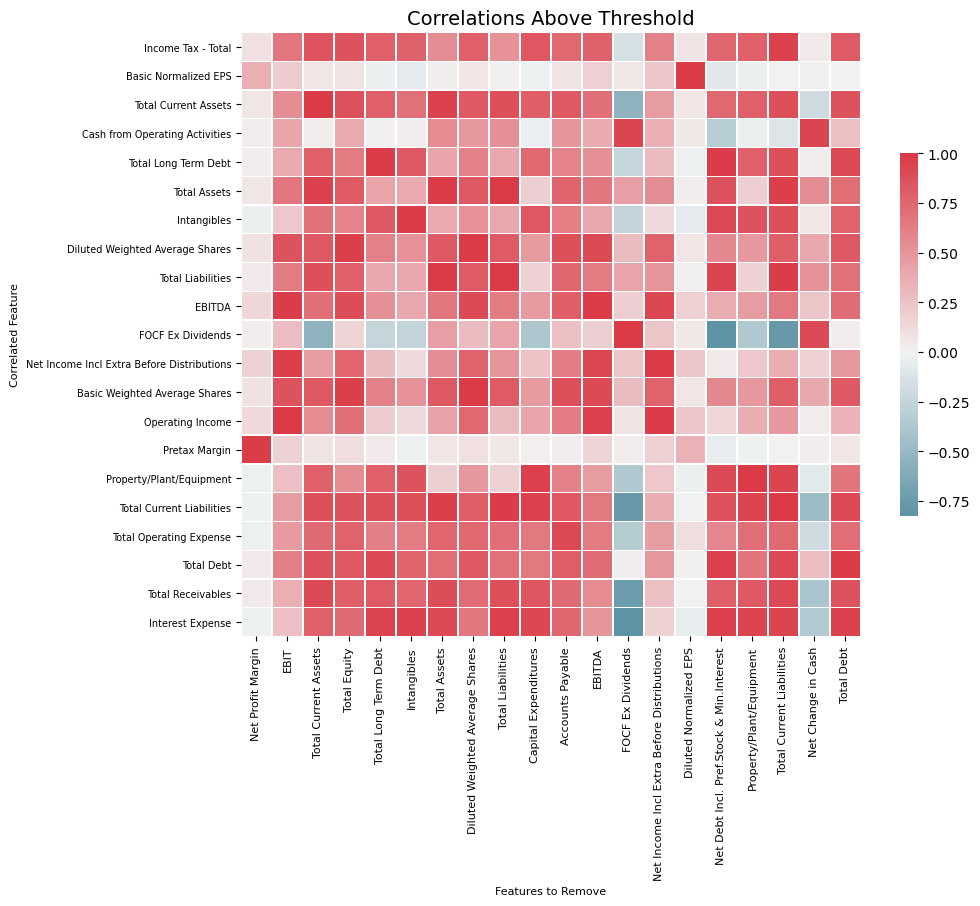

In [12]:
fs.identify_collinear(X_train, 0.9)
fs.plot_collinear()

In [13]:
X_train = X_train.drop(['Net Income Incl Extra Before Distributions', 'Diluted Normalized EPS', 
                        'Diluted Weighted Average Shares', 'EBITDA', 'EBIT', 'Total Current Assets', 
                        'Property/Plant/Equipment', 'Intangibles', 'Total Assets', 'Accounts Payable', 
                        'Total Current Liabilities', 'Total Long Term Debt', 'Total Debt', 'Total Liabilities', 
                        'Total Equity', 'Net Debt Incl. Pref.Stock & Min.Interest', 'Capital Expenditures', 
                        'FOCF Ex Dividends', 'Net Change in Cash', 'Net Profit Margin'],
          axis=1)

In [14]:
X_train

,Total Operating Expense,Operating Income,Interest Expense,Income Tax - Total,Basic Normalized EPS,Basic Weighted Average Shares,Gross Margin,EBIT Margin,Cash and Short Term Investments,Total Receivables,Total Inventory,Notes Payable/Short Term Debt,Retained Earnings (Accumulated Deficit),Other Long Term Assets,Cash from Operating Activities,Cash from Investing Activities,Cash from Financing Activities,Pretax Margin
Name,,,,,,,,,,,,,,,,,,
THG.HM,1.157450e+12,1.615134e+11,1.320407e+10,3.402730e+10,7894.85155,15191740.0,24.47911,12.978764,2.513683e+11,2.601581e+11,4.197878e+11,1.161841e+11,2.333814e+11,1.820062e+10,1.014588e+11,-3.099781e+10,-2.451351e+09,12.32526
CLL.HM,1.656025e+11,9.867838e+10,5.907294e+07,1.359379e+10,2401.28259,34000000.0,40.47875,33.029611,2.827407e+11,3.972938e+10,2.919618e+09,0.000000e+00,1.243366e+11,1.588836e+10,1.034323e+11,2.131112e+10,-7.778692e+10,37.25121
HVX.HM,6.738490e+11,-1.228209e+09,9.767350e+09,3.384479e+08,20.91101,41525250.0,4.75756,1.267995,4.805266e+09,2.815353e+10,1.178607e+11,1.719616e+11,8.840916e+09,4.364625e+10,2.573937e+10,-9.105469e+09,-1.974209e+10,0.17942
HU3.HM,1.548112e+11,4.613252e+08,1.413486e+09,3.630567e+08,31.77111,9999940.0,9.77215,0.815218,1.353596e+10,1.349408e+11,1.155496e+11,6.642973e+10,2.375773e+10,9.240743e+08,-3.760780e+10,-6.964630e+06,4.734659e+10,0.65947
BMC.HM,1.158461e+11,2.159860e+10,0.000000e+00,3.316036e+09,1407.41867,12392630.0,29.87125,16.641590,7.954497e+10,1.769598e+10,9.056113e+10,0.000000e+00,1.599028e+10,1.439315e+10,8.017253e+10,-3.591384e+09,NaN,15.10255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPH.HM,2.434964e+11,2.513019e+10,2.667884e+10,1.178179e+10,371.15775,95357800.0,40.27166,18.601849,7.785229e+09,8.624875e+11,7.602335e+11,4.059740e+11,7.743770e+10,2.034342e+10,-1.612951e+11,-2.566603e+10,1.554796e+11,9.46625
TLD.HM,3.915733e+11,1.679076e+10,6.951034e+09,4.014430e+08,410.71807,39956370.0,7.97100,5.291948,2.762528e+10,1.855668e+11,1.110674e+11,9.393885e+10,3.639552e+10,3.327076e+09,1.237552e+10,-2.625704e+10,8.721909e+09,4.08046
BHN.HM,6.561402e+12,4.014516e+11,1.106440e+10,9.007791e+10,1359.46584,231800000.0,24.38509,4.072099,3.166424e+12,5.464975e+11,5.535204e+11,NaN,1.548412e+12,3.088402e+11,6.270777e+11,5.715382e+10,-7.404954e+11,6.14316


***FEATURES SELECTION***

Text(0.5, 1.0, 'FEATURE IMPORTANCE')

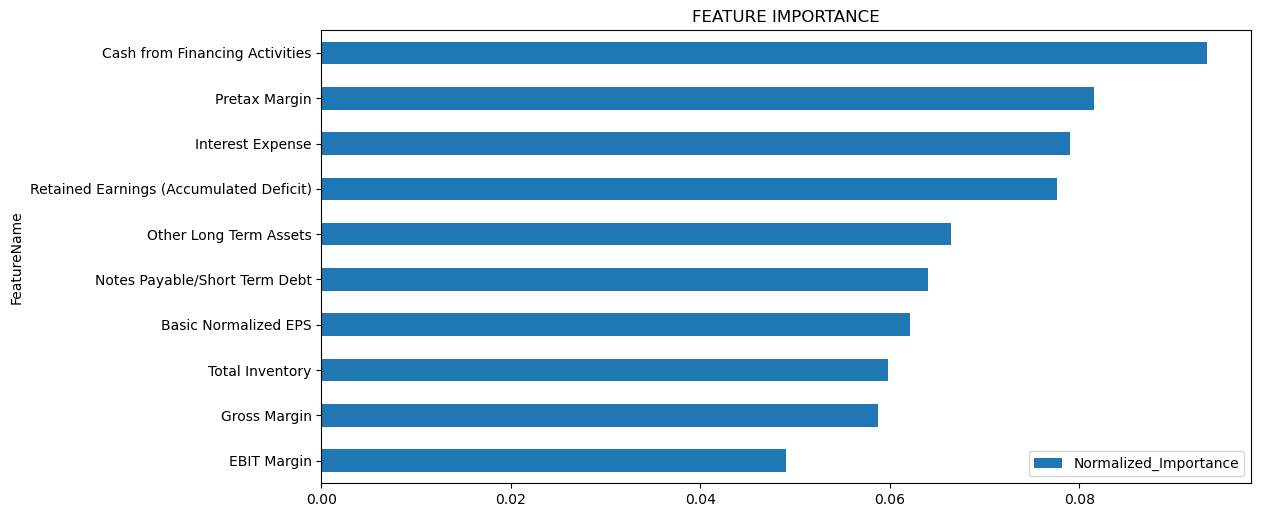

In [15]:
model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)
model.fit(X_train,y_train)
importance_dt = model.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': X_train.columns, 
                                        'Feature Importance': importance_dt})
features_importances_dt['Normalized_Importance'] = features_importances_dt['Feature Importance'] / features_importances_dt['Feature Importance'].sum()
features_importances_dt.sort_values(by=['Feature Importance'], ascending=False)

features_importances_dt.sort_values("Feature Importance", ascending=False).iloc[:10,:].sort_values("Feature Importance").plot(figsize=(12,6),
                                                                             x="FeatureName", 
                                                                             y=["Normalized_Importance"], 
                                                                             kind="barh")
features_importances_dt
plt.title("Feature Importance".upper())


In [16]:
features_final = features_importances_dt.sort_values("Feature Importance", ascending=False).iloc[:10,:]['FeatureName'].values.tolist()
features_final

['Cash from Financing Activities',
 'Pretax Margin',
 'Interest Expense',
 'Retained Earnings (Accumulated Deficit)',
 'Other Long Term Assets',
 'Notes Payable/Short Term Debt',
 'Basic Normalized EPS',
 'Total Inventory',
 'Gross Margin',
 'EBIT Margin']

# EDA

In [17]:
X_train = X_train[features_final]

In [18]:
X_test = X_test[features_final]

In [19]:
X_train['Target'] = y_train
X_train = X_train.dropna()
y_train = X_train['Target']
X_train = X_train.drop('Target',axis = 1)

In [20]:
X_test['Target'] = y_test
X_test = X_test.dropna()
y_test = X_test['Target']
X_test = X_test.drop('Target',axis = 1)

In [21]:
X_train

,Cash from Financing Activities,Pretax Margin,Interest Expense,Retained Earnings (Accumulated Deficit),Other Long Term Assets,Notes Payable/Short Term Debt,Basic Normalized EPS,Total Inventory,Gross Margin,EBIT Margin
Name,,,,,,,,,,
THG.HM,-2.451351e+09,12.32526,1.320407e+10,2.333814e+11,1.820062e+10,1.161841e+11,7894.85155,4.197878e+11,24.47911,12.978764
CLL.HM,-7.778692e+10,37.25121,5.907294e+07,1.243366e+11,1.588836e+10,0.000000e+00,2401.28259,2.919618e+09,40.47875,33.029611
HVX.HM,-1.974209e+10,0.17942,9.767350e+09,8.840916e+09,4.364625e+10,1.719616e+11,20.91101,1.178607e+11,4.75756,1.267995
HU3.HM,4.734659e+10,0.65947,1.413486e+09,2.375773e+10,9.240743e+08,6.642973e+10,31.77111,1.155496e+11,9.77215,0.815218
BKG.HM,-2.191015e+09,7.36629,3.944313e+09,5.021701e+10,9.494994e+08,2.884675e+10,702.99999,7.970222e+10,10.66708,8.651652
...,...,...,...,...,...,...,...,...,...,...
LBM.HM,-2.526092e+10,12.77221,0.000000e+00,5.516876e+10,2.068109e+10,0.000000e+00,8056.95633,6.803430e+10,22.91387,12.595358
VPH.HM,1.554796e+11,9.46625,2.667884e+10,7.743770e+10,2.034342e+10,4.059740e+11,371.15775,7.602335e+11,40.27166,18.601849
TLD.HM,8.721909e+09,4.08046,6.951034e+09,3.639552e+10,3.327076e+09,9.393885e+10,410.71807,1.110674e+11,7.97100,5.291948


In [22]:
full = X_train.copy()
full['Target'] = y_train
test = X_test.copy()
test['Target'] = y_test
full = pd.concat([full,test])

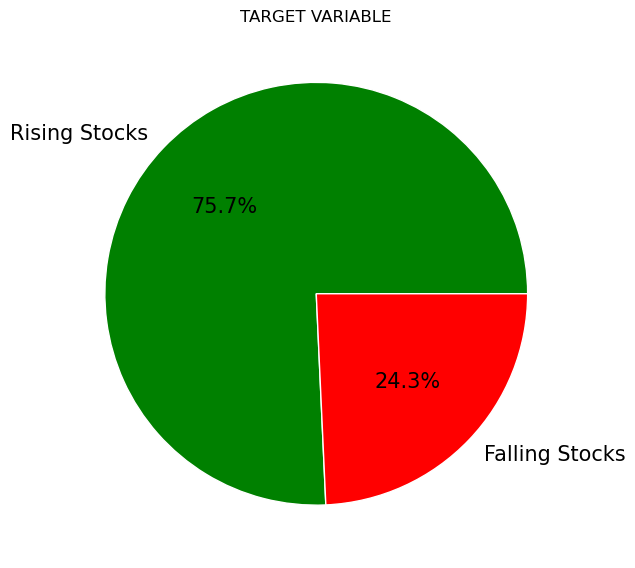

In [23]:
fig = plt.figure(figsize =(10, 7))
plt.pie(full['Target'].value_counts(), labels = ["Rising Stocks","Falling Stocks"], colors = ['Green','r']
        , autopct='%.1f%%' ,textprops={'fontsize': 15},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('TARGET VARIABLE');

The amount of stocks with positive return (class = 1) is about 3 times greater than the number of stocks with negative return (class = 0).

In [24]:
full.describe()

,Cash from Financing Activities,Pretax Margin,Interest Expense,Retained Earnings (Accumulated Deficit),Other Long Term Assets,Notes Payable/Short Term Debt,Basic Normalized EPS,Total Inventory,Gross Margin,EBIT Margin,Target
count,3.460000e+02,346.000000,3.460000e+02,3.460000e+02,3.460000e+02,3.460000e+02,346.000000,3.460000e+02,346.000000,346.000000,346.000000
mean,4.704137e+11,11.160045,2.110400e+11,9.176588e+11,4.558907e+11,1.054664e+12,2207.943128,2.174935e+12,20.531247,9.054661,0.757225
std,2.923238e+12,24.972108,1.015217e+12,3.866282e+12,2.591530e+12,3.232403e+12,2994.026831,8.360467e+12,18.938225,19.014343,0.429381
min,-5.257398e+12,-177.294820,0.000000e+00,-9.328983e+12,8.339020e+06,0.000000e+00,-8647.635000,0.000000e+00,-43.564280,-64.043316,0.000000
25%,-1.119880e+11,2.808010,5.005780e+09,3.956139e+10,8.714716e+09,2.747669e+10,570.848185,7.952482e+10,8.574710,2.350346,1.000000
50%,-2.191015e+09,7.998900,2.585647e+10,1.513749e+11,3.308450e+10,2.055295e+11,1540.379765,3.323958e+11,17.120680,7.219609,1.000000
75%,2.685765e+11,17.753385,9.568722e+10,4.473369e+11,1.529502e+11,6.464484e+11,3066.345740,1.038944e+12,30.123848,14.669197,1.000000
max,2.567202e+13,162.753580,1.028889e+13,5.625940e+13,4.252726e+13,3.754701e+13,25561.348910,1.101569e+14,96.341580,69.732416,1.000000


# RESULTS

***DECISION TREE CLASSIFIER***

              precision    recall  f1-score   support

           0       0.29      0.44      0.35        16
           1       0.80      0.67      0.73        52

    accuracy                           0.62        68
   macro avg       0.54      0.56      0.54        68
weighted avg       0.68      0.62      0.64        68

Decision Tree Accuracy: 62.0%


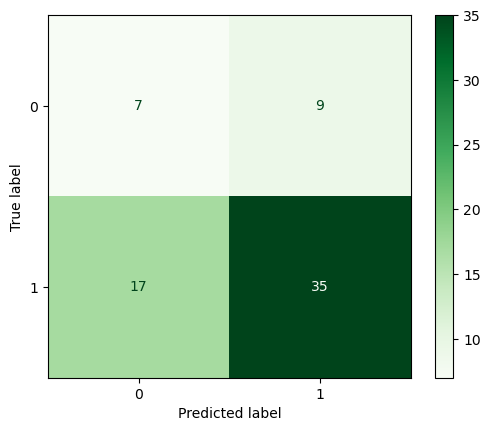

In [25]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

my_tree = DecisionTreeClassifier(max_depth=4,class_weight='balanced',random_state = 0)
model = my_tree.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(my_tree, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

- Accuracy in the prediction of the decision tree model is quite low at only 62%.
- In addition, most of the stocks that fell (class = 0) were omitted in the prediction results. So recall at this class is very low, only 0.44.
- Most importantly, the precision(class = 1) is quite good (0.8). This is extremely important because forecasting stocks that increase in price must be highly accurate (expressed in precision). Investors will lose money if they mistakenly invest in a falling stock, whereas it is not a big deal if they accidentally ignore a rising stock. So even though the model doesn't have high accuracy, decision tree is still a pretty good model for this problem.

***RANDOM FOREST CLASSIFIER***

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.96      0.94      0.95        52

    accuracy                           0.93        68
   macro avg       0.89      0.91      0.90        68
weighted avg       0.93      0.93      0.93        68

Random Forest Accuracy: 93.0%


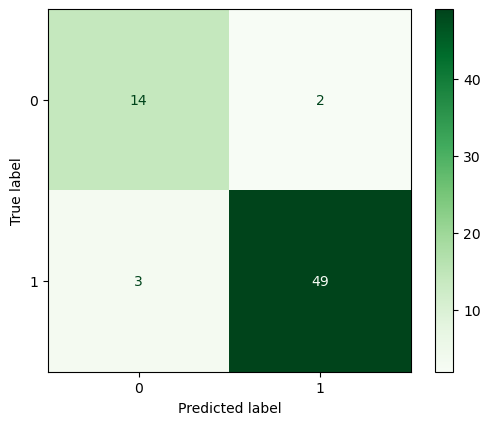

In [26]:
my_forest = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state = 0)
model = my_forest.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(my_forest, X_test, y_test,cmap='Greens')
print(classification_report(y_test, y_pred))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')

- Accuracy in the prediction of the random forest model is very good at 93%.
- The stocks in each class are forecasted quite accurately, without the "missing" phenomenon as in the decision tree model. So precision and recall are both very high.
- The random forest model shows superior predictive performance compared to the decision tree model.